<a href="https://colab.research.google.com/github/raianilar17/New_Hello_World/blob/master/final_Cifar_10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Datasets (CIFAR-10)

In [1]:
from zipfile import ZipFile
file_name = "cifar-10-batches-py.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [2]:
from zipfile import ZipFile
file_name = "model.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [102]:
from zipfile import ZipFile
file_name = "test_images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
 #remove file
  #!rm -rf filename

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4923630636995418109, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8012835978273236239
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 614811336436687179
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14892338381
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8966131965153622185
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [18]:
#!wget https://drive.google.com/open?id=1H-2e1kkILsOtN9Fc_jox2N8Um0Uypo91

--2019-06-26 06:53:17--  https://drive.google.com/open?id=1H-2e1kkILsOtN9Fc_jox2N8Um0Uypo91
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.100, 74.125.142.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 307 OK
Location: https://drive.google.com/drive/folders/1H-2e1kkILsOtN9Fc_jox2N8Um0Uypo91?usp=drive_open [following]
--2019-06-26 06:53:18--  https://drive.google.com/drive/folders/1H-2e1kkILsOtN9Fc_jox2N8Um0Uypo91?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘open?id=1H-2e1kkILsOtN9Fc_jox2N8Um0Uypo91.1’

open?id=1H-2e1kkILs     [  <=>               ] 180.83K   819KB/s    in 0.2s    

2019-06-26 06:53:18 (819 KB/s) - ‘open?id=1H-2e1kkILsOtN9Fc_jox2N8Um0Uypo91.1’ saved [185168]



Train data (X_train):  (50000, 32, 32, 3)
Train labels (y_train):  (50000, 1)
Test data (X_test):  (10000, 32, 32, 3)
Test labels (y_test):  (10000, 1)


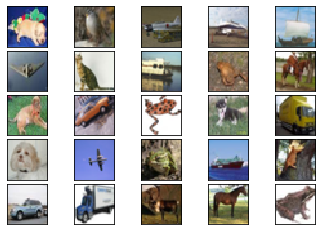

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
import os

"""
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 
training images and 10000 test images.
The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains 
exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random 
order, but some training batches may contain more images from one class than another. Between them, the training 
batches contain exactly 5000 images from each class.
"""


def load_batch(f_path, label_key='labels'):
    """Internal utility for parsing CIFAR data.
    # Arguments
        fpath: path the file to parse.
        label_key: key for label data in the retrieve
            dictionary.
    # Returns
        A tuple `(data, labels)`.
    """
    with open(f_path, 'rb') as f:
        if sys.version_info < (3,):
            d = pickle.load(f)
        else:
            d = pickle.load(f, encoding='bytes')
            # decode utf8
            d_decoded = {}
            for k, v in d.items():
                d_decoded[k.decode('utf8')] = v
            d = d_decoded
    data = d['data']
    labels = d[label_key]

    data = data.reshape(data.shape[0], 3, 32, 32)
    return data, labels


def load_data(path, negatives=False):
    """Loads CIFAR10 dataset.
    # Returns
        Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.
    """

    num_train_samples = 50000

    x_train_local = np.empty((num_train_samples, 3, 32, 32), dtype='uint8')
    y_train_local = np.empty((num_train_samples,), dtype='uint8')

    for i in range(1, 6):
        fpath = os.path.join(path, 'data_batch_' + str(i))
        (x_train_local[(i - 1) * 10000: i * 10000, :, :, :],
         y_train_local[(i - 1) * 10000: i * 10000]) = load_batch(fpath)

    fpath = os.path.join(path, 'test_batch')
    x_test_local, y_test_local = load_batch(fpath)

    y_train_local = np.reshape(y_train_local, (len(y_train_local), 1))
    y_test_local = np.reshape(y_test_local, (len(y_test_local), 1))

    if negatives:
        x_train_local = x_train_local.transpose(0, 2, 3, 1).astype(np.float32)
        x_test_local = x_test_local.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        x_train_local = np.rollaxis(x_train_local, 1, 4)
        x_test_local = np.rollaxis(x_test_local, 1, 4)

    return (x_train_local, y_train_local), (x_test_local, y_test_local)


if __name__ == "__main__":
    """show it works"""

    cifar_10_dir = 'cifar-10-batches-py'

    (X_train, y_train), (X_test, y_test) = load_data(cifar_10_dir)

    print("Train data (X_train): ", X_train.shape)
    print("Train labels (y_train): ", y_train.shape)
    print("Test data (X_test): ", X_test.shape)
    print("Test labels (y_test): ", y_test.shape)

    # Don't forget that the label_names and filesnames are in binary and need conversion if used.

    # display some random training images in a 25x25 grid
    num_plot = 5
    fig, ax = plt.subplots(num_plot, num_plot)
    for m in range(num_plot):
        for n in range(num_plot):
            idx = np.random.randint(0, X_train.shape[0])
            ax[m, n].imshow(X_train[idx])
            ax[m, n].get_xaxis().set_visible(False)
            ax[m, n].get_yaxis().set_visible(False)
    fig.subplots_adjust(hspace=0.1)
    fig.subplots_adjust(wspace=0)
    plt.show()

In [199]:
def load_classes():
    import pickle
    path = 'cifar-10-batches-py/'
    file = 'batches.meta'
    
    f = open(path+file, 'rb')
    dict = pickle.load(f)
    return dict['label_names']

def print_classes(label_names):
    for i in range(0, 10):
        print(str(i) + " : " + label_names[i] + "  ")

label_names = load_classes()
print_classes(label_names)

0 : airplane  
1 : automobile  
2 : bird  
3 : cat  
4 : deer  
5 : dog  
6 : frog  
7 : horse  
8 : ship  
9 : truck  


# Divide Train Datasets into Train and Valid

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid  = train_test_split(X_train, y_train, test_size=0.2, random_state=1)



# Dataset Summary and Exploration

In [201]:
import numpy as np

# Number of training examples
n_train = (len(X_train))

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# shape of an  image
image_shape = X_train[0].shape

# count unique classes/labels in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 40000
Number of validation examples = 10000
Number of testing examples = 10000
Image data shape = (32, 32, 3)
Number of classes = 10


# Data Exploration and Visualization

In [0]:
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

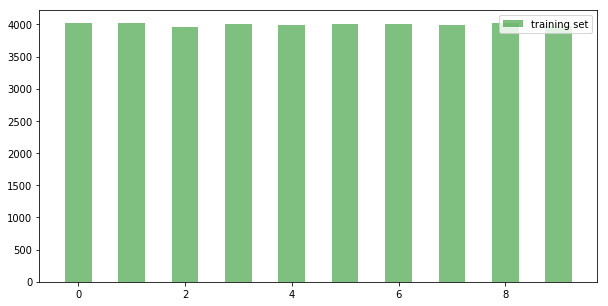

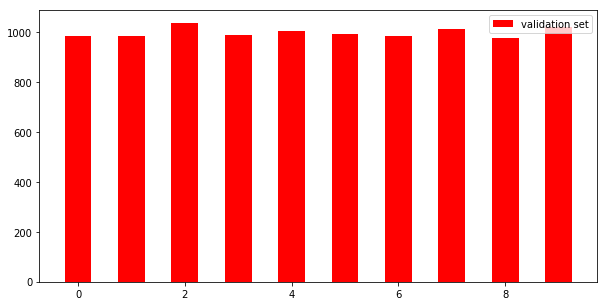

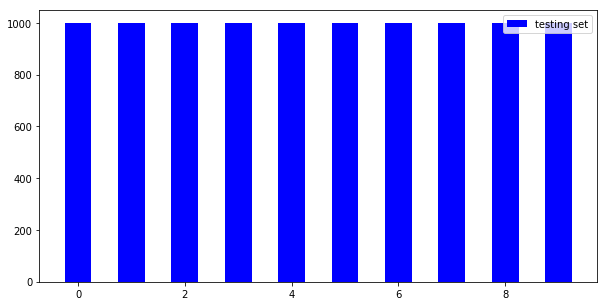

In [203]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.5
unique_tr, counts_tr = np.unique(y_train, return_counts=True)
plt.bar(unique_tr, counts_tr, width, alpha=0.5, label='training set', color='g')
plt.legend(loc='upper right')
plt.show()

# Save the figure...
#fig.savefig('output_images/' + 'Data_Exploration_Training_Set' + '.jpg')

fig, ax = plt.subplots(figsize=(10,5))
width = 0.5
unique_v, counts_v = np.unique(y_valid, return_counts=True)
plt.bar(unique_v, counts_v, width, alpha=1, label='validation set', color='r')
plt.legend(loc='upper right')
plt.show()

# Save the figure...
#fig.savefig('output_images/' + 'Data_Exploration_Validation_Set' + '.jpg')


fig, ax = plt.subplots(figsize=(10,5))
width = 0.5
unique_t, counts_t = np.unique(y_test, return_counts=True)
plt.bar(unique_t, counts_t, width, alpha=1, label='testing set', color='b')
plt.legend(loc='upper right')
plt.show()


# Save the figure...
#fig.savefig('output_images/' + 'Data_Exploration_Testing_Set' + '.jpg')


# Data Set Summary And Exploration

The size of training set is 40000 RGB images. The size of the validation set is 10000 RGB images. The size of test set is 10000 RGB images. The shape of a cifar-10 image is (32,32,3). The number of unique classes/labels in the data set is 10.


LABEL: 0 "airplane"
COUNT: 4014


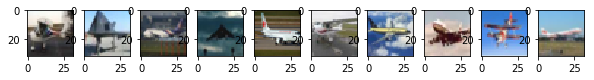

LABEL: 1 "automobile"
COUNT: 4014


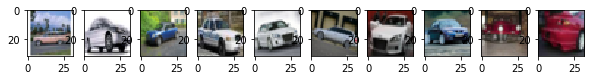

LABEL: 2 "bird"
COUNT: 3962


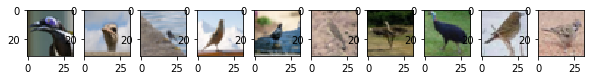

LABEL: 3 "cat"
COUNT: 4011


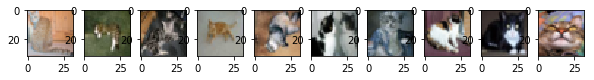

LABEL: 4 "deer"
COUNT: 3993


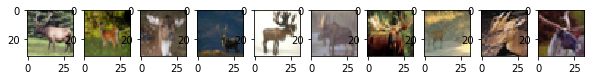

LABEL: 5 "dog"
COUNT: 4005


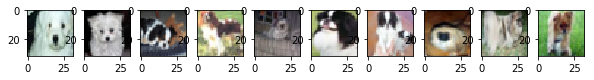

LABEL: 6 "frog"
COUNT: 4013


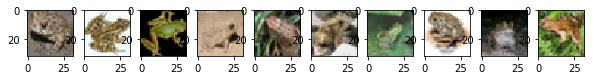

LABEL: 7 "horse"
COUNT: 3988


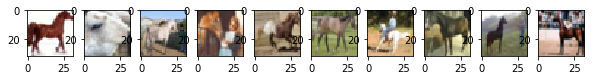

LABEL: 8 "ship"
COUNT: 4022


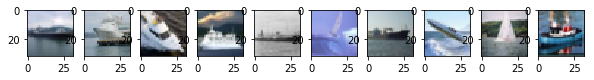

LABEL: 9 "truck"
COUNT: 3978


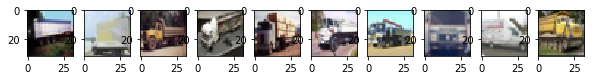

In [204]:
import csv
import random

    
labels = np.unique(y_train)
for label in labels:
    label_indices = np.where(y_train==label)[0]
    print('LABEL: {} "{}"'.format(label, label_names[label]))
    print('COUNT: {}'.format(y_train[y_train==label].shape[0]))
    fig = plt.figure(figsize=(10, 10))
    for i in range(10):
        rand_index = random.choice(label_indices)
        sub = fig.add_subplot(10, 10, i+1)
        sub.imshow(X_train[rand_index], interpolation='nearest')
    plt.show()
    # Save the figure...
    #fig.savefig('output_images/' + 'Data_Visualization' + str(label) +'.jpg')
    

# Design and Test a Model Architecture


## Preprocessing

In [0]:
def preprocess(images):
    """
    1. Convert each image to grayscale and equalize histogram
    2. Normalize image values and set the mean to zero
    """
    out = np.empty(images.shape[:3], dtype=np.float32)
    for idx in range(out.shape[0]):
        out[idx] = cv2.equalizeHist(cv2.cvtColor(images[idx], cv2.COLOR_RGB2GRAY))
        out[idx] = cv2.normalize(out[idx], out[idx], alpha=-0.5, beta=0.5,
                                 norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return out.reshape(out.shape + (1,))

In [0]:
def normalize(x):
    """
        argument
            - x: input image data in numpy array [32, 32, 3]
        return
            - normalized x 
    """
    min_val = np.min(x)
    max_val = np.max(x)
    x = (x-min_val) / (max_val-min_val)
    return x

In [0]:
def visualize_class(X_data, y_labels=[], cmap=None,
                    rows=1, cols=12, maxtitlelen=18, figsize=(15,1)):
    """
    Convenience method to visualize sets of images. If a set of corresponding
    class labels is passed, they will be printed along with the image.
    """
    has_labels = len(y_labels) > 0
    assert not has_labels or len(X_data) == len(y_labels)

    plt.figure(figsize=figsize)
    for i, img in enumerate(X_data):
        plt.subplot(rows, cols, i+1, xticks=[], yticks=[])
        plt.imshow(img, interpolation="nearest", cmap=cmap)
        if has_labels:
            y_val = y_labels[i]
            y_label = label_names[y_val][:maxtitlelen]
            plt.title("{}: {}".format(y_val, y_label), loc="left")
    plt.show()

In [208]:
import cv2

# preprocess data and copy y_labels to avoid shuffling original data during training

X_train_process, y_train_process = preprocess(X_train), np.copy(y_train)
X_valid_process, y_valid_process = preprocess(X_valid), np.copy(y_valid)
X_test_process, y_test_process = preprocess(X_test), np.copy(y_test)

"""
X_train_process, y_train_process = normalize(X_train), np.copy(y_train)
X_valid_process, y_valid_process = normalize(X_valid), np.copy(y_valid)
X_test_process, y_test_process = normalize(X_test), np.copy(y_test)"""

'\nX_train_process, y_train_process = normalize(X_train), np.copy(y_train)\nX_valid_process, y_valid_process = normalize(X_valid), np.copy(y_valid)\nX_test_process, y_test_process = normalize(X_test), np.copy(y_test)'

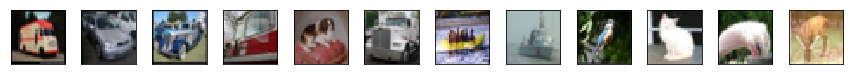

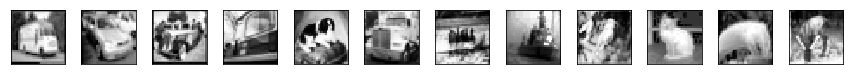

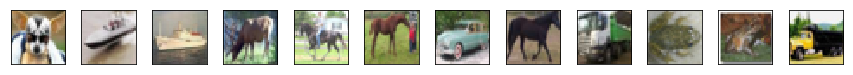

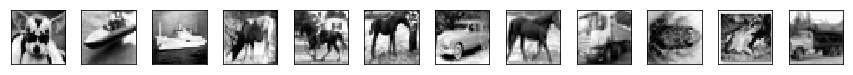

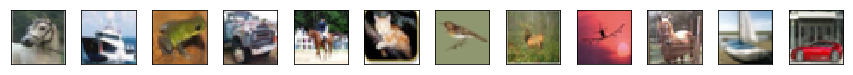

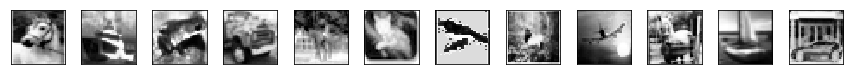

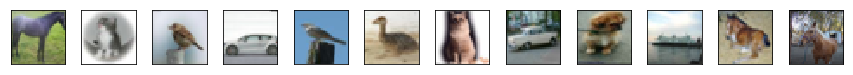

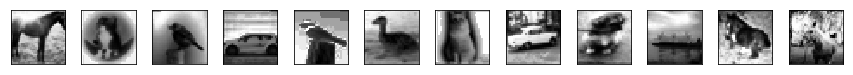

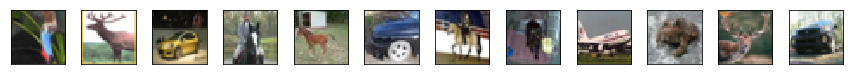

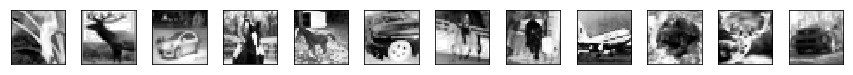

In [209]:
for index in range(5):
    rand_indices = np.random.choice(X_train.shape[0], size=12)
    subset_unprocessed = X_train[rand_indices]
    subset_processed = X_train_process[rand_indices]
    visualize_class(subset_unprocessed)
    visualize_class(subset_processed.reshape(subset_processed.shape[:3]), cmap="gray")
    #visualize_class(subset_processed)



In [210]:
# Number of training examples
n_train = (len(X_train_process))

# Number of validation examples
n_validation = len(X_valid_process)

# Number of testing examples.
n_test = len(X_test_process)

# shape of an  image
image_shape = X_train_process[0].shape

# count unique classes/labels in the dataset.
n_classes = len(np.unique(y_train_process))

print("Dataset summary After preprocessing \n")
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Dim of train datasets =", X_train_process.shape)
print("Dim of valid datasets =", X_valid_process.shape)
print("Dim of test datasets =", X_test_process.shape)
print("Dim of target of train datasets =", y_train_process.shape)
print("Dim of target of valid datasets =", y_valid_process.shape)
print("Dim of target of test datasets =", y_test_process.shape)

Dataset summary After preprocessing 

Number of training examples = 40000
Number of validation examples = 10000
Number of testing examples = 10000
Image data shape = (32, 32, 1)
Number of classes = 10
Dim of train datasets = (40000, 32, 32, 1)
Dim of valid datasets = (10000, 32, 32, 1)
Dim of test datasets = (10000, 32, 32, 1)
Dim of target of train datasets = (40000, 1)
Dim of target of valid datasets = (10000, 1)
Dim of target of test datasets = (10000, 1)


# Model Architecture

In [0]:
# defining architecture 

import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 30
BATCH_SIZE = 16
LEARN_RATE = 0.001
SAVE_FILE = "./model/model.h5"

# Store layers weight & bias
weight_var = lambda w_shape: tf.Variable(tf.truncated_normal(w_shape, mean=0, stddev=0.1), name="weights")
bias_var = lambda n_vars: tf.Variable(tf.zeros(n_vars), name="biases")

def conv2d(layer, W, b, strides=1):
    out = tf.nn.conv2d(layer, W, strides=(1,strides,strides,1), padding="SAME")
    out = tf.nn.bias_add(out, b)
    return tf.nn.relu(out, name="relu")

def pool(layer, k=2):
    return tf.nn.max_pool(layer, ksize=(1,k,k,1), strides=(1,k,k,1), padding="SAME", name="pool")

def fully_connected(layer, W, b, activate=True):
    out = tf.add(tf.matmul(layer, W), b)
    if activate:
        out = tf.nn.relu(out, name="relu")
    return out

# Modified Version of LeNeT-5

In [0]:
keep_prob = tf.placeholder(tf.float32, name="keep_prob")

def Model(X_inputs):
    # Layer 1: Convolutional. Input = 32x32x1.
    with tf.variable_scope("conv1"):
        conv1 = conv2d(X_inputs, weight_var((5,5,1,32)), bias_var(32)) # Output = 32x32x32.
        conv1 = pool(conv1, k=2) # Output = 16x16x32.

    # Layer 2: Convolutional.
    with tf.variable_scope("conv2"):
        conv2 = conv2d(conv1, weight_var((5,5,32,64)), bias_var(64)) # Output = 16x16x64.
        conv2 = pool(conv2, k=2) # Output = 8x8x64.
    
    # Layer 3: Convolutional.
    with tf.variable_scope("conv3"):
        conv3 = conv2d(conv2, weight_var((5,5,64,128)), bias_var(128)) # Output = 8x8x128.
        conv3 = pool(conv3, k=2) # Output = 4x4x128.

    # Layer 4: Flatten, Pool & Concatenate Layers.
    with tf.variable_scope("flat"):
        try:
            # TensorFlow v1.0.1: tf.concat(values, axis);
            flat = tf.concat((flatten(pool(conv1, k=4)),
                              flatten(pool(conv2, k=2)),
                              flatten(conv3)), 1) # Output 3584.
        # Prior TF versions: tf.concat(axis, values) :D
        except:
            flat = tf.concat(1, (flatten(pool(conv1, k=4)),
                              flatten(pool(conv2, k=2)),
                              flatten(conv3))) # Output 3584.
        flat = tf.nn.dropout(flat, keep_prob=keep_prob)

    # Layer 5: Fully Connected.
    with tf.variable_scope("fc1"):
        fc1 = fully_connected(flat, weight_var((3584,1024)), bias_var(1024)) # Output = 1024.
        fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)

    # Layer 6: Fully Connected. Out.
    with tf.variable_scope("fc2"):
        return fully_connected(fc1, weight_var((1024,10)), bias_var(10), activate=False) # Output = 10.


# Model_2

In [0]:
keep_prob = tf.placeholder(tf.float32, name="keep_prob")


def Model_2(X_inputs):
    conv1_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 1, 32], mean=0, stddev=0.1))
    conv2_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 32, 64], mean=0, stddev=0.1))
    conv3_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128], mean=0, stddev=0.1))
    conv4_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 128, 256], mean=0, stddev=0.1))
    conv5_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 256, 512], mean=0, stddev=0.1))

    # 1, 2
    conv1 = tf.nn.conv2d(X_inputs, conv1_filter, strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(conv1)
    conv1_pool = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv1_bn = tf.layers.batch_normalization(conv1_pool)

    # 3, 4
    conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv2)
    conv2_pool = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')    
    conv2_bn = tf.layers.batch_normalization(conv2_pool)
  
    # 5, 6
    conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides=[1,1,1,1], padding='SAME')
    conv3 = tf.nn.relu(conv3)
    conv3_pool = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  
    conv3_bn = tf.layers.batch_normalization(conv3_pool)
    
    # 7, 8
    conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides=[1,1,1,1], padding='SAME')
    conv4 = tf.nn.relu(conv4)
    conv4_pool = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv4_bn = tf.layers.batch_normalization(conv4_pool)
    
     # 9, 10
    conv5 = tf.nn.conv2d(conv4_bn, conv5_filter, strides=[1,1,1,1], padding='SAME')
    conv5 = tf.nn.relu(conv5)
    conv5_pool = tf.nn.max_pool(conv5, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv5_bn = tf.layers.batch_normalization(conv5_pool)
    
    # 11
    flat = tf.contrib.layers.flatten(conv4_bn)  

    # 12
    full1 = tf.contrib.layers.fully_connected(inputs=flat, num_outputs=128, activation_fn=tf.nn.relu)
    full1 = tf.nn.dropout(full1, keep_prob)
    full1 = tf.layers.batch_normalization(full1)
    
    # 13
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=256, activation_fn=tf.nn.relu)
    full2 = tf.nn.dropout(full2, keep_prob)
    full2 = tf.layers.batch_normalization(full2)
    
    # 14
    full3 = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=512, activation_fn=tf.nn.relu)
    full3 = tf.nn.dropout(full3, keep_prob)
    full3 = tf.layers.batch_normalization(full3)    
    
    # 15
    full4 = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=1024, activation_fn=tf.nn.relu)
    full4 = tf.nn.dropout(full4, keep_prob)
    full4 = tf.layers.batch_normalization(full4)        
    
    # 16
    out = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=10, activation_fn=None)
    return out

# Features and Labels

In [0]:
# Remove previous weights, bias, inputs, etc..
#tf.reset_default_graph()

X = tf.placeholder(tf.float32, (None, 32, 32, 1), name="X")
y = tf.placeholder(tf.int32, (None),name="y")
one_hot_y = tf.one_hot(y, 10)

# Training pipeline


In [0]:
logits = Model_2(X)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
# Learning rate
learning_rate = tf.placeholder(tf.float32, shape=[])
#rate = 0.001
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)


# Model Evaluation

In [0]:
#correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
correct_prediction = tf.equal(tf.argmax(logits), tf.argmax(one_hot_y))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_labels):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_labels[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def loss(X_data, y_labels):
    sess = tf.get_default_session()
    cost_loss = sess.run(loss_operation, 
                    feed_dict={
                        X: X_data,
                        y: y_labels,
                        keep_prob: 1.
                    })
    return cost_loss

# Train the model

In [217]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("The Training is in progression...")
    print()
    #print("EPOCH\t\t","TRAIN_ACCURACY\t\t","TRAIN_LOSS\t\t","VALIDATION_ACCURACY\t\t","VALIDATION_LOSS\n")
    print("EPOCH\t\t","TRAIN_ACCURACY\t\t","VALIDATION_ACCURACY\n")
   
    val = []
    train = []
    val_loss = []
    train_loss = []
    num_examples = len(X_train_process)
    for i in range(EPOCHS):
        X_train_process, y_train_process = shuffle(X_train_process, y_train_process)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_process[offset:end], y_train_process[offset:end]
            sess.run(training_operation, feed_dict={X: batch_x, y: batch_y, keep_prob: 0.50, learning_rate: LEARN_RATE})
        #training_loss = loss(X_train_process, y_train_process)
        #validation_loss = loss(X_valid_process, y_valid_process)                                              
        train_accuracy = evaluate(X_train_process, y_train_process)
        validation_accuracy = evaluate(X_valid_process, y_valid_process)
        val.append(validation_accuracy)
        train.append(train_accuracy)
        #val_loss.append(validation_loss)
        #train_loss.append(training_loss)                                              
        
        #print('{}\t\t{:.6f}\t\t{:>10.4f}\t\t{:.6f}\t\t{:>10.4f}\n'.format(i+1,train_accuracy,training_loss,validation_accuracy,validation_loss))
        print('  {}\t\t  {:.6f}\t\t  {:.6f}\n'.format(i+1,train_accuracy,validation_accuracy))
       
        
    saver.save(sess, SAVE_FILE)
    print("Model saved")

The Training is in progression...

EPOCH		 TRAIN_ACCURACY		 VALIDATION_ACCURACY

  1		  0.297640		  0.286720

  2		  0.365120		  0.344960

  3		  0.391680		  0.374400

  4		  0.403680		  0.368640

  5		  0.437600		  0.392320

  6		  0.454320		  0.393280

  7		  0.467960		  0.406240

  8		  0.484800		  0.401920

  9		  0.487160		  0.402880

  10		  0.513560		  0.425120

  11		  0.516400		  0.421760

  12		  0.520000		  0.425600

  13		  0.521760		  0.415360

  14		  0.529880		  0.416480

  15		  0.533840		  0.419840

  16		  0.534920		  0.419680

  17		  0.545000		  0.429120

  18		  0.534240		  0.416320

  19		  0.540040		  0.422720

  20		  0.534680		  0.421440

  21		  0.538920		  0.423360

  22		  0.538320		  0.429120

  23		  0.542360		  0.419520

  24		  0.538760		  0.427840

  25		  0.541560		  0.422240

  26		  0.539200		  0.422400

  27		  0.543760		  0.422240

  28		  0.543640		  0.422240

  29		  0.540560		  0.421600

  30		  0.543800		  0.418240

Model saved


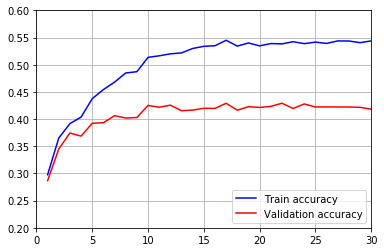

EPOCH 30
Train Accuracy = 0.544
Validation Accuracy = 0.418



In [220]:

x_axis = range(1, EPOCHS+1)
plt.axis([0, 30, 0.2, 0.6])
plt.plot(x_axis, train, label='Train accuracy', color='b')
plt.plot(x_axis, val, label='Validation accuracy', color='r')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print("EPOCH 30")
print("Train Accuracy = {:.3f}".format(train_accuracy))
print("Validation Accuracy = {:.3f}".format(validation_accuracy))
print()

# Evaluate the model

In [221]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    tf.train.Saver().restore(sess, SAVE_FILE)
    test_accuracy = evaluate(X_test_process, y_test_process)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Accuracy = 0.422


In [222]:
with tf.Session() as sess:
   
    sess.run(tf.global_variables_initializer())
    tf.train.Saver().restore(sess, SAVE_FILE)
    
    train_accuracy = evaluate(X_train_process, y_train_process)
    print("Train Accuracy: {:.3f}".format(train_accuracy))
    
    valid_accuracy = evaluate(X_valid_process, y_valid_process)
    print("Valid Accuracy: {:.3f}".format(valid_accuracy))
    
    test_accuracy = evaluate(X_test_process, y_test_process)
    print("Test Accuracy: {:.3f}".format(test_accuracy))

Train Accuracy: 0.544
Valid Accuracy: 0.418
Test Accuracy: 0.422


# Confusion matrix

Compute the confusion matrix from predictions made by the model on the test set compared to the labels. The matrix columns represent the prediction labels and the rows represent the true labels. The diagonal from the top left to the bottom right represents the agreement of the prediction and the ground truth.


In [0]:
import itertools

def plot_confusion_matrix(confusion_matrix):
    plt.figure(figsize=(15,15))
    plt.imshow(confusion_matrix, interpolation="nearest", cmap=plt.cm.Blues)

    thresh = confusion_matrix.max() / 2.
    rows, cols = confusion_matrix.shape
    for i, j in itertools.product(range(rows), range(cols)):
        count = confusion_matrix[i,j]
        if count > 0:
            plt.text(j, i, count, size="smaller",
                     horizontalalignment="center", verticalalignment="center",
                     color="white" if count > thresh else "black")

    plt.title("Confusion Matrix")
    tick_marks = np.arange(confusion_matrix.shape[0])
    tick_labels = [label_names[tm] for tm in tick_marks]
    plt.xticks(tick_marks, tick_labels, rotation=90)
    plt.yticks(tick_marks, tick_labels)
    plt.tight_layout()
    plt.ylabel('True label', size="x-large")
    plt.xlabel('Predicted label', size="x-large")
    


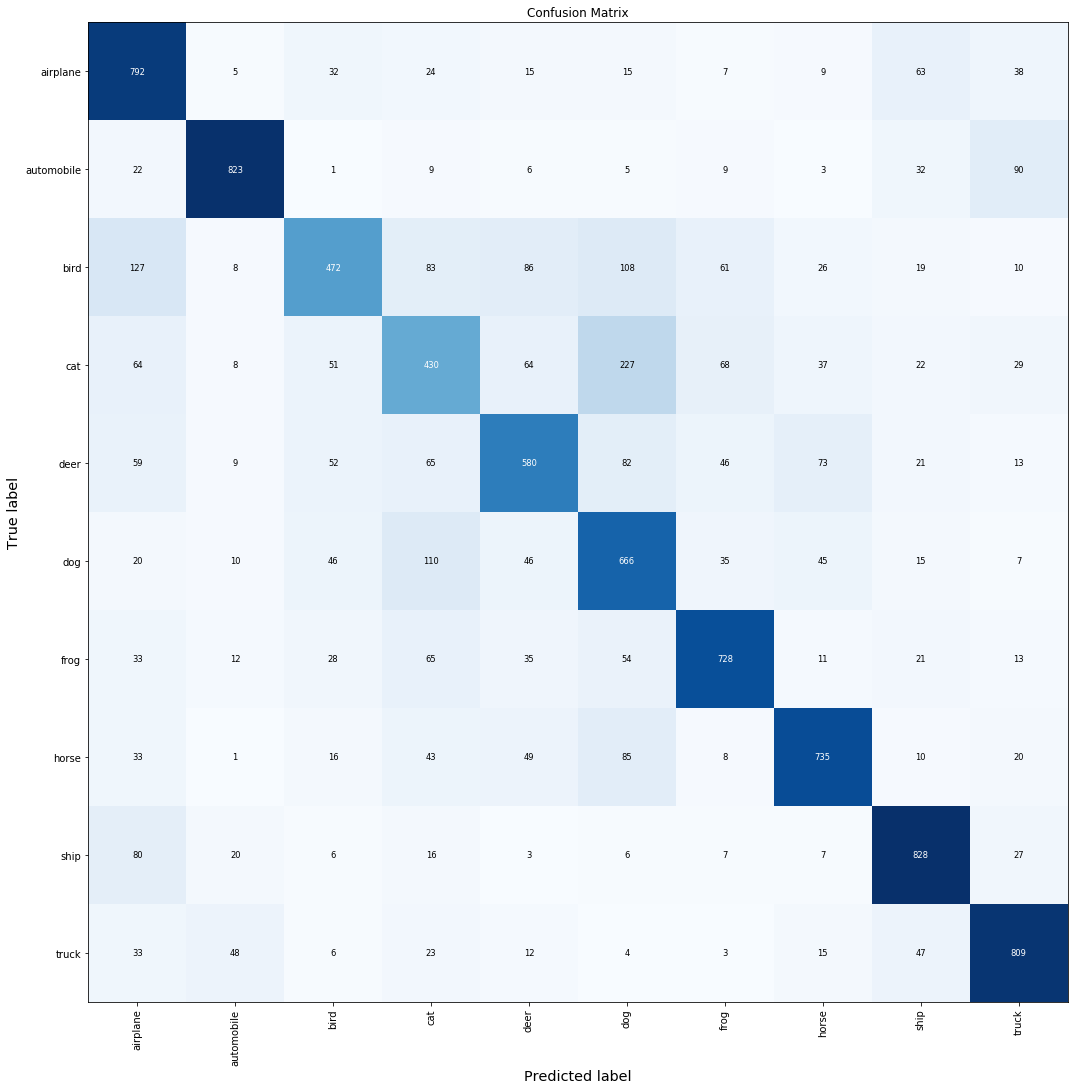

In [224]:
y_predictions = tf.argmax(logits, 1)
#y_predictions = tf.argmax(logits)
y_truth = tf.convert_to_tensor(y_test_process)
confusion_operation = tf.contrib.metrics.confusion_matrix(y_truth, y_predictions)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, SAVE_FILE)
    confusion = sess.run(confusion_operation, feed_dict={X: X_test_process, keep_prob: 1.})
    plot_confusion_matrix(confusion)
    #Save the full figure...
    #plt.savefig('output_images/' + 'confusion matrix' + '.jpg')

# Test a Model on New Images

In [0]:
#load_test_images

import glob
import cv2

cifar_classes = np.array([9,4,6,0,3,1,8,7,2,5])
n_cifars = len(cifar_classes)
#print(len(cifar_classes))
images = [cv2.imread(file) for file in glob.glob("test_images/*.jpg")]
cifar_data = np.array(images)
cifar_data_process = preprocess(cifar_data)
#print(len(cifar_data))
#print(len(cifar_data_process))


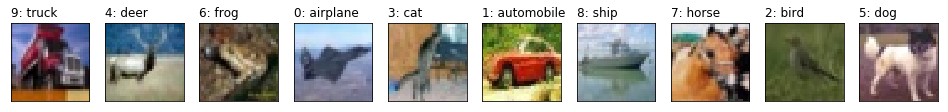

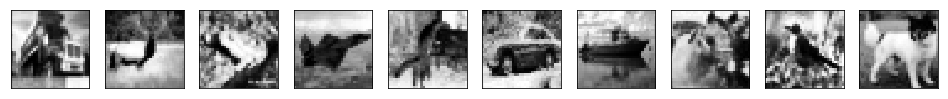

In [226]:
visualize_class(cifar_data, cifar_classes, maxtitlelen=10, figsize=(20, 2))
visualize_class(cifar_data_process.reshape(cifar_data_process.shape[:3]), figsize=(20, 2), cmap="gray")

## Predict the Cifar datasets Type for Each Image

In [0]:
### Run the predictions and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.


n_preds = 5
prediction_operation = tf.nn.top_k(tf.nn.softmax(logits), n_preds)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, SAVE_FILE)
    probs, pred_classes = sess.run(prediction_operation, feed_dict={X: cifar_data_process, keep_prob: 1.})


In [0]:
def prediction_confidence(img,cifar_classes, likelihoods, predictions):
    labels = ["{:.4f}% : {}".format(likelihoods[i]*100, label_names[c])
              for i, c in enumerate(predictions)]
    y_pos = np.arange(len(labels))

    #plt.figure(figsize=(4,2))
    plt.figure(figsize=(11,2))
    plt.subplot(121, xticks=[], yticks=[])
    y_label = label_names[cifar_classes]
    plt.title("{}".format(y_label), loc="left")
    plt.imshow(img)
    plt.subplot(122)
    plt.barh(y_pos, likelihoods)
    plt.yticks(y_pos, labels, position=(1.2,1), ha="left", weight="semibold")
    plt.show()


# Output Top 5 Softmax Probabilities For Each Image 

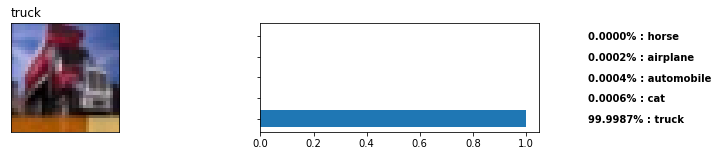

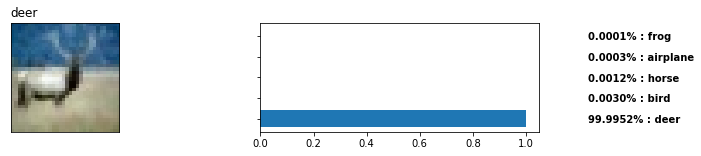

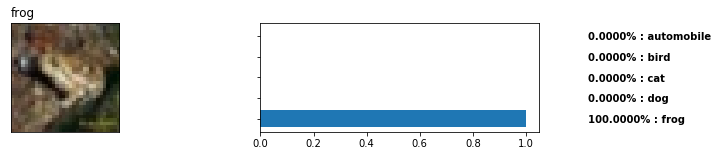

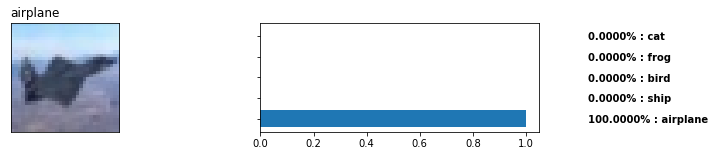

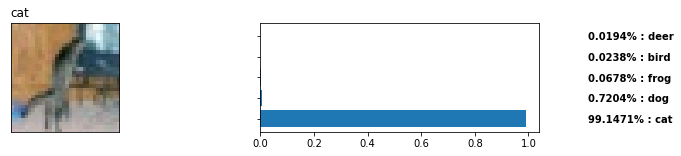

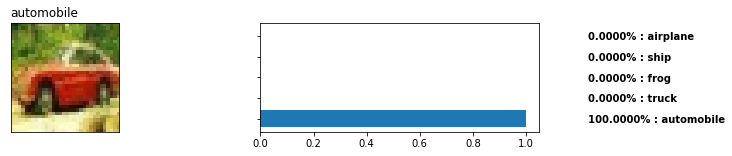

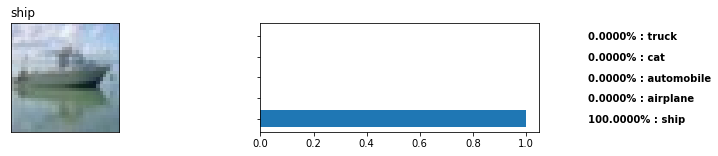

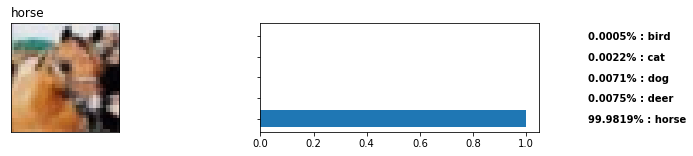

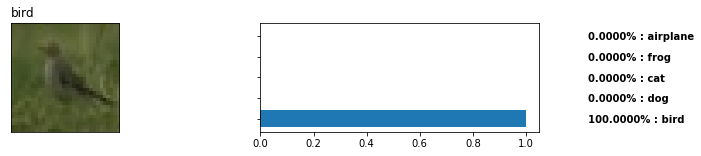

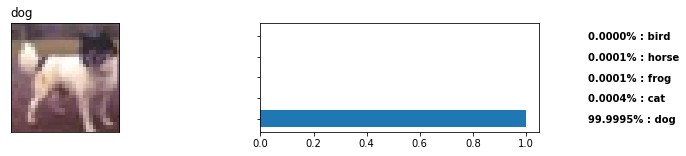

In [229]:
for idx in range(n_cifars):
    prediction_confidence(cifar_data[idx], cifar_classes[idx], probs[idx], pred_classes[idx])

## The new test images (10) accuracy is 100%